# Characters Segmentation

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import json
from mylib import *
from difflib import Differ
from IPython.display import HTML as html_print

### main variables

In [2]:
image_path = '../images/05.png'
walsh_path = '../res/walsh.json'
db_path = '../res/database.json'
expected_path = '../images/04.expected'
white = 0
black = 1
thresh = 250
blue=(255,255,0)
green=(0,255,0)
red=(0,255,255)
violet=(155,205,155)

### Read Image

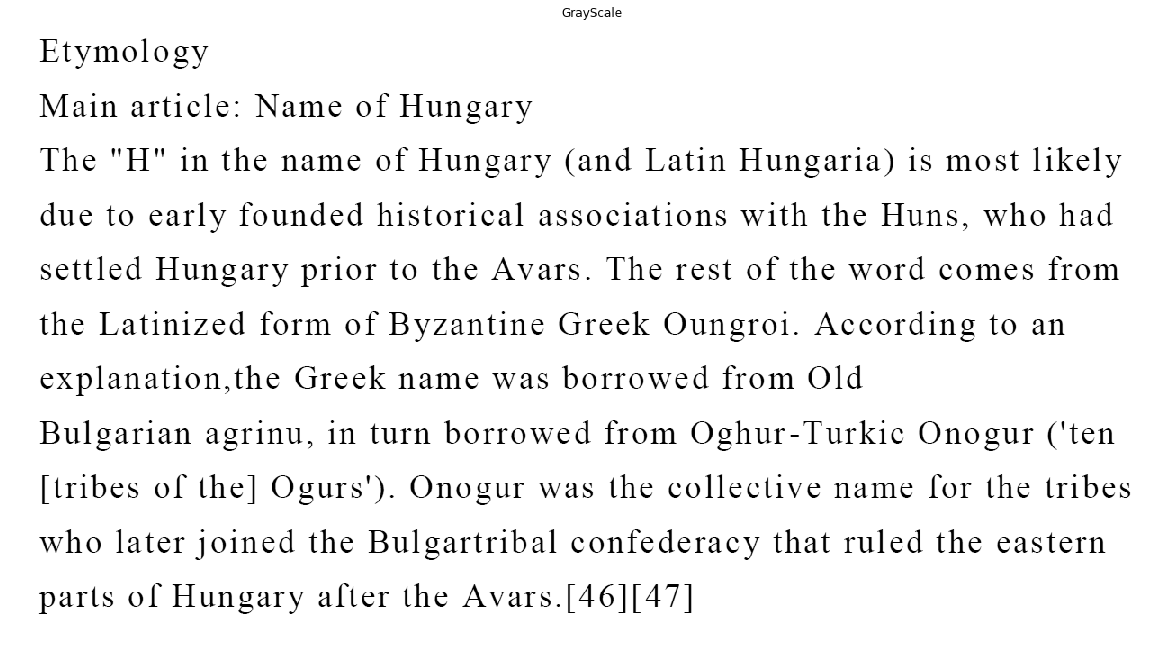

In [3]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'GrayScale', invert=False)

## Convert to Black and White

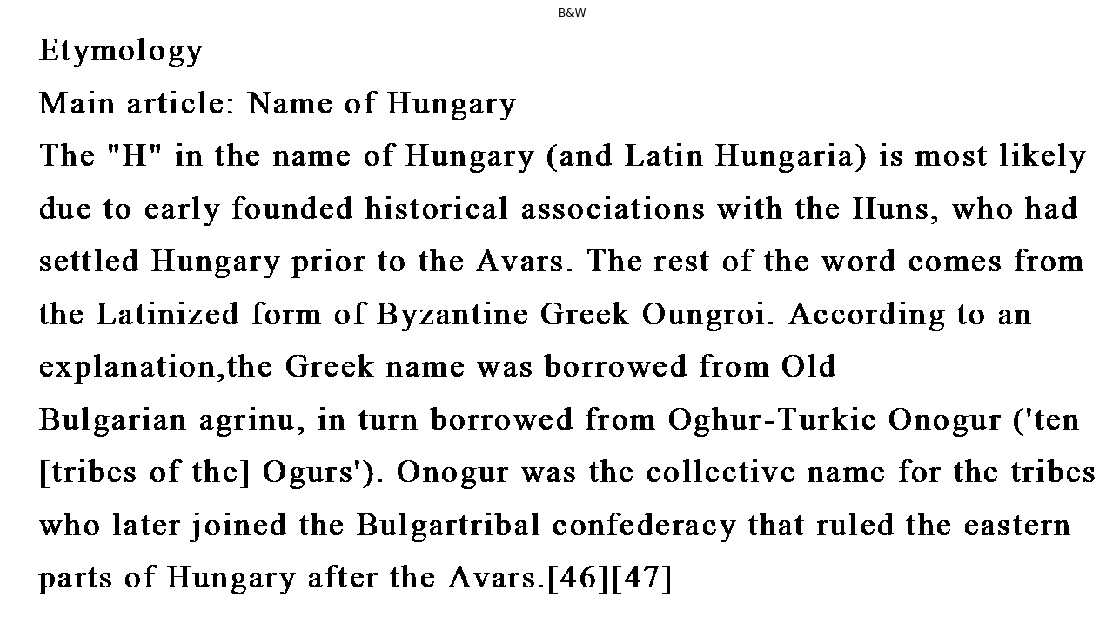

In [4]:
bw=1-gray_to_bw(gray, thresh)//255
plotimage(bw, 'B&W', figsize=(15,15))

### Vertical Segmentation

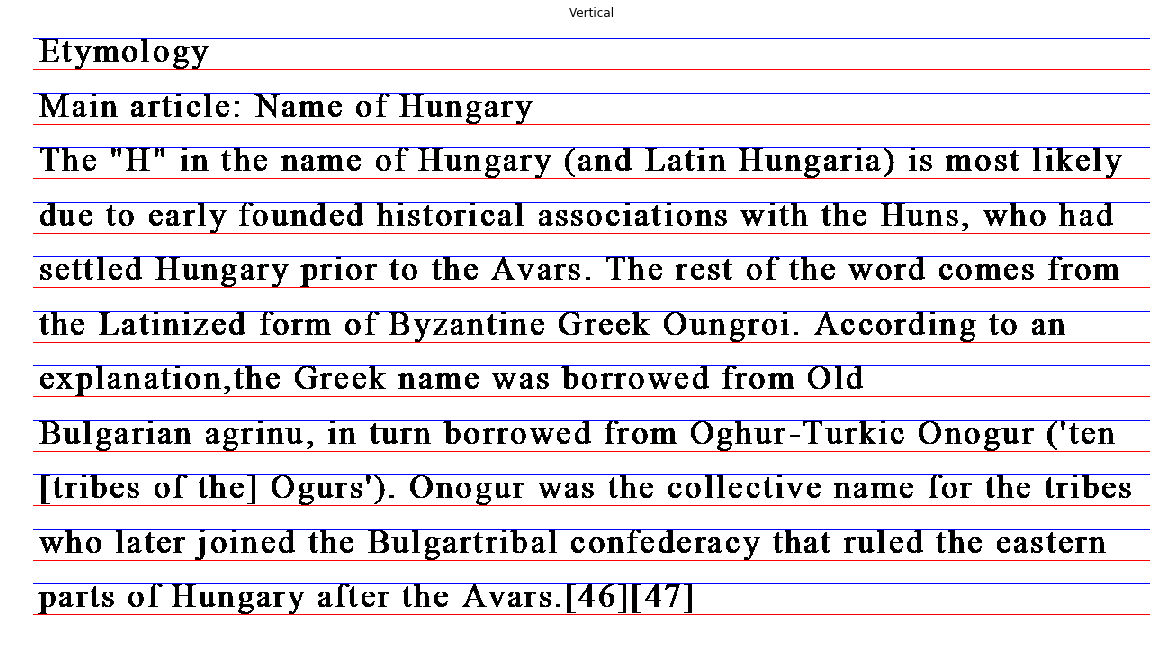

In [5]:
lines = vert_seg(bw)
vert = 255*bw.copy()
vert = cv2.cvtColor(vert, cv2.COLOR_GRAY2RGB)
draw_vert_lines(vert, lines)
plotimage(vert, 'Vertical')

### Horizontal Segmentation

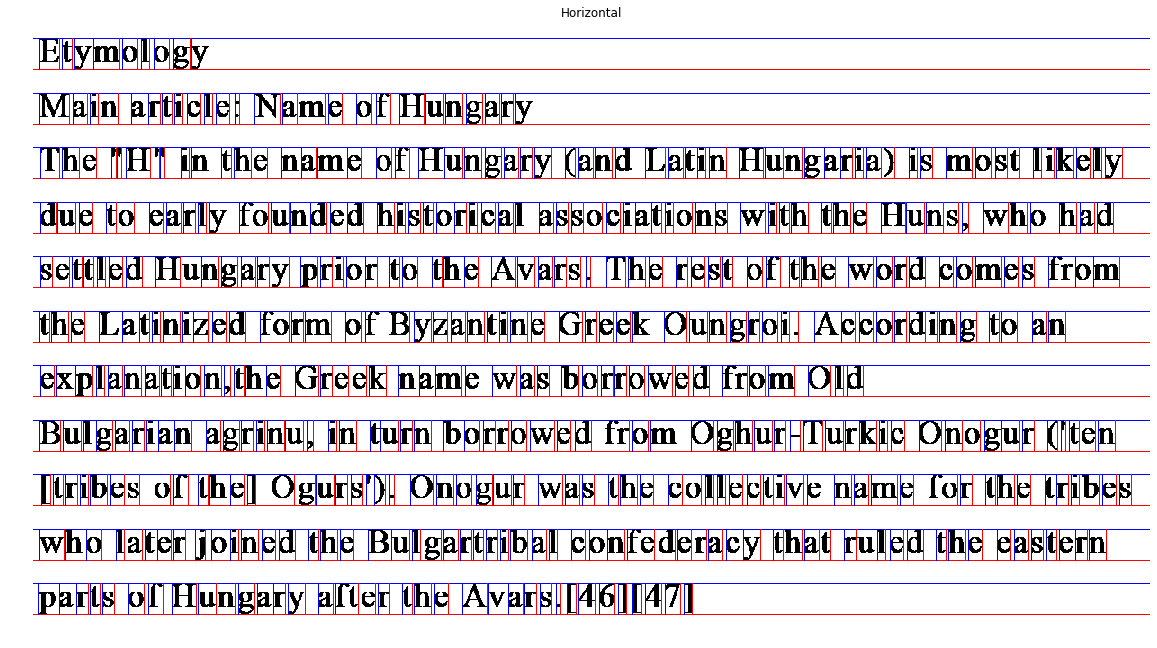

In [6]:
i = 0
start = 0

for line in lines:
    img = bw[line['start']:line['end'],:]
    line['chars'] = hor_seg(img)

hor = vert.copy()
for line in lines:
    start = line['start']
    end = line['end']
    draw_hor_lines(hor, line['chars'], start, end)

plotimage(hor, 'Horizontal')

## Plotting Some Random chars

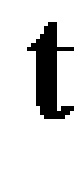

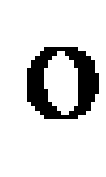

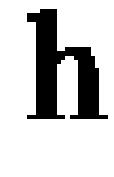

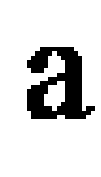

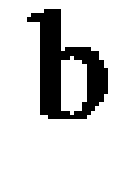

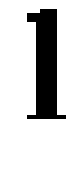

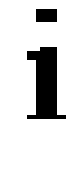

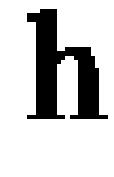

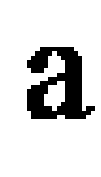

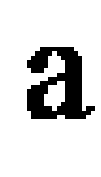

In [7]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = bw[line['start']:line['end'],char['start']:char['end']]
    
    plotimage(img,'',(2,2))

### Vertical Segmentation for every Char

In [8]:
for line in lines:
    for char in line['chars']:
        img = bw[line['start']:line['end'],char['start']:char['end']]
        char['vertical_parts'] = vert_seg(img)

[{'start': 0, 'end': 26}]


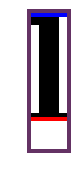

[{'start': 9, 'end': 26}]


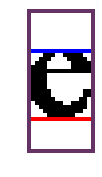

[{'start': 0, 'end': 3}, {'start': 9, 'end': 26}]


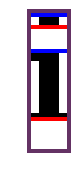

[{'start': 9, 'end': 26}]


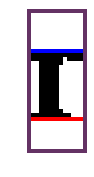

[{'start': 0, 'end': 26}]


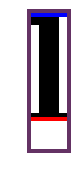

[{'start': 9, 'end': 26}]


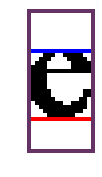

[{'start': 1, 'end': 26}]


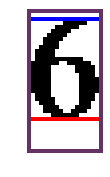

[{'start': 1, 'end': 26}]


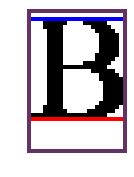

[{'start': 9, 'end': 26}]


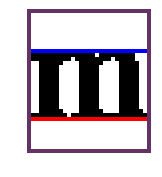

[{'start': 0, 'end': 3}, {'start': 9, 'end': 26}]


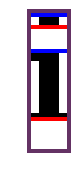

In [9]:
for k in range(10):
    i = random.randint(0,len(lines)-1)
    line = lines[i]
    j = random.randint(0,len(line['chars'])-1)
    char = line['chars'][j]
    
    img = 255*bw[line['start']:line['end'],char['start']:char['end']]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) 
    
    draw_vert_lines(img, char['vertical_parts'])
            
    img = draw_borders(img, color=violet)
#     img = draw_borders(img, color=0)
    print(char['vertical_parts'])
    plotimage(img,'', (2,2))

## Walsh-Functions

### Read walsh functions

In [10]:
with open(walsh_path) as f:
    s = f.read()
walsh_list = json.loads(s)
walsh = []
for l in walsh_list:
    walsh.append(np.array(l))

### Calculcate Walsh Vectors

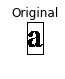

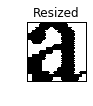

Walsh= [2235, -223, 287, -147, 53, -77, 41, -73, -9, -47, 123, 157, 25, -45, 101, 47, -311, -321, -71, 63, -509, -199, -5, -23, 849, -101, -63, 155, -477, -11, -61, 77, -565, 85, 23, -71, -43, 263, -47, 35, 103, -67, -205, -95, -119, -33, -35, -173, -103, -77, -47, 75, -165, -43, -85, 45, 25, -33, 49, -9, -29, -31, -37, -31]


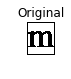

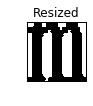

Walsh= [2307, 43, 347, 43, 185, -135, 177, -135, 69, 105, 69, 105, 27, 63, 27, 63, 471, -129, -193, -129, -99, -35, -91, -35, 41, 21, 41, 21, -17, -37, -17, -37, 41, -143, -127, -143, -81, -113, -89, -113, 63, 91, 63, 91, 69, 97, 69, 97, -983, 25, 145, 25, 127, 7, 135, 7, 15, 27, 15, 27, -59, -47, -59, -47]


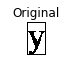

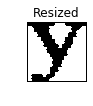

Walsh= [1312, 402, 130, 88, 280, -50, 158, 72, 344, -50, 306, -172, 88, -142, 166, -100, -496, 26, 598, 252, 88, 30, 298, -4, -144, -138, -82, 8, 104, -54, 2, -120, -148, -530, -410, -60, 72, 270, -242, 64, 8, 38, -134, -116, -108, 86, -78, 152, -244, 262, 106, -120, -32, -106, 194, 12, -64, 30, 54, 160, 44, -26, 38, -68]


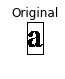

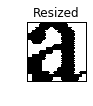

Walsh= [2235, -223, 287, -147, 53, -77, 41, -73, -9, -47, 123, 157, 25, -45, 101, 47, -311, -321, -71, 63, -509, -199, -5, -23, 849, -101, -63, 155, -477, -11, -61, 77, -565, 85, 23, -71, -43, 263, -47, 35, 103, -67, -205, -95, -119, -33, -35, -173, -103, -77, -47, 75, -165, -43, -85, 45, 25, -33, 49, -9, -29, -31, -37, -31]


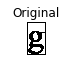

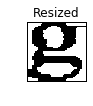

Walsh= [1931, -43, -65, 141, 133, -73, 285, -157, 189, -129, -43, -157, 155, -123, -57, -35, -73, -187, 91, 13, -559, 7, -167, 163, 397, 163, 29, -49, -69, -247, -97, -23, -661, -195, 83, -79, 105, 211, -115, 19, -67, -57, 121, -25, -297, -119, -65, 53, -217, 85, 103, -127, -83, -77, 25, 59, -19, -93, 105, -77, 15, 93, 7, 73]


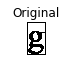

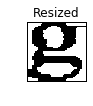

Walsh= [1931, -43, -65, 141, 133, -73, 285, -157, 189, -129, -43, -157, 155, -123, -57, -35, -73, -187, 91, 13, -559, 7, -167, 163, 397, 163, 29, -49, -69, -247, -97, -23, -661, -195, 83, -79, 105, 211, -115, 19, -67, -57, 121, -25, -297, -119, -65, 53, -217, 85, 103, -127, -83, -77, 25, 59, -19, -93, 105, -77, 15, 93, 7, 73]


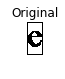

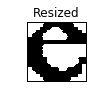

Walsh= [2109, -1, 257, -241, -425, -95, 251, 249, 291, -247, -473, -39, 97, 199, -179, -41, 213, 143, -751, 255, -449, -71, -493, -151, 187, 105, -329, 25, 201, -33, -155, -57, -361, -91, -285, -59, 125, -29, 73, -37, -75, 119, 145, -121, 71, -71, -5, 73, 27, 9, -257, 185, -87, 7, 53, -73, -7, -37, -19, -5, 131, 93, 119, 37]


In [11]:
c = 7 #samples to plot

for line in lines:
    for char in line['chars']:
        start=line['start']
        end=line['end']
        
        if char['vertical_parts'] and len(char['vertical_parts'])>0:
            start=line['start']+char['vertical_parts'][0]['start']
            end=line['start']+char['vertical_parts'][-1]['end']
                    
        img = bw[start:end,char['start']:char['end']]
        img = img.copy()
        if 0 in img.shape:
            print("IMAGE WITH SHAPE: ",img.shape)
            print("start:", start, "end:", end, "char['start']", char['start'],"char['end']",char['end'])
        img = cv2.resize(img, (64,64))
        v = []
        for w in walsh:
            v.append(inner_prod(img, w))
        char['walsh_vector'] = v        
        
        if c and np.random.randint(10)==0:
            original_img = bw[line['start']:line['end'],char['start']:char['end']]
            plotimage(draw_borders(original_img,black),title='Original')
            plotimage(draw_borders(img,black), title='Resized')
            print("Walsh=", v)
            c-=1
        

### Vector Comparison

Distance = 0


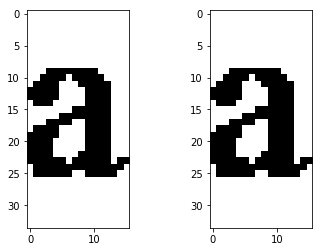

In [12]:
vecs = []
for k in range(2):
    i = np.random.randint(0, len(lines))
    j = np.random.randint(0, len(lines[i]['chars']))
    if k==0:
        i,j=1,1
    char = lines[i]['chars'][j]
    line_start = lines[i]['start']
    line_end = lines[i]['end']
    char_start = char['start']
    char_end = char['end']
    
    plt.subplot(121+k), plt.imshow(1-bw[line_start:line_end,char_start:char_end], cmap='gray')
    vecs.append(char['walsh_vector'])
    
print("Distance =", distance(vecs[0], vecs[1]))
    
# v1 = lines[1]['chars'][0]['walsh_vector']
# v2 = lines[1]['chars'][5]['walsh_vector']

# inner_prod(v1, v2)

## Read Database

In [13]:
with open(db_path) as f:
    db = json.loads(f.read())

### Compare Letters to Database & Predict

In [14]:
for i in range(len(lines)):
    for j in range(len(lines[i]['chars'])):
        char = lines[i]['chars'][j]
        line_start = lines[i]['start']
        line_end = lines[i]['end']
        char_start = char['start']
        char_end = char['end']

        min_dist = -1
        min_letter = 'NaN'
        for letter in db:
            dist = distance(letter['walsh_vector'], char['walsh_vector'])
            if min_dist == -1 or dist < min_dist:
                min_dist = dist
                min_letter = letter['character']
        char['prediction']=min_letter

### Estimating Spaces

In [15]:
for line in lines:
    space_lengths = [] #the spaces between all characters in this line
    chars = line['chars']

    #remove all existing spaces:
    for i in reversed(range(len(chars))):
        if chars[i]['prediction']==' ':
            del chars[i]
            
    for i in range(len(chars)-1):
        char = chars[i]
        next_char = chars[i+1]
        space_lengths+=[next_char['start'] - char['end']]
    avg = np.mean(space_lengths)
    avg*=1.5
    print(space_lengths)
    print(avg)
    for i in reversed(range(len(space_lengths))):
        if space_lengths[i] > avg:
            chars.insert(i+1, {'start': chars[i]['end'], 'end': chars[i+1]['start'], 'prediction': ' '})

[3, 3, 2, 3, 4, 5, 5, 2]
5.0625
[4, 3, 3, 15, 3, 2, 3, 5, 4, 4, 6, 17, 3, 2, 4, 16, 5, 10, 2, 2, 4, 3, 2, 3]
7.8125
[3, 4, 17, 1, 5, 5, 1, 18, 3, 14, 3, 3, 16, 3, 2, 4, 17, 4, 10, 2, 2, 4, 3, 2, 3, 15, 4, 2, 4, 15, 4, 2, 3, 4, 14, 2, 2, 3, 4, 2, 3, 4, 3, 16, 4, 15, 4, 5, 3, 15, 5, 3, 3, 4, 4]
8.727272727272727
[1, 4, 15, 3, 17, 4, 3, 3, 4, 14, 3, 2, 3, 4, 4, 15, 3, 4, 3, 4, 3, 3, 5, 4, 3, 17, 3, 4, 4, 5, 4, 4, 2, 4, 4, 4, 3, 15, 4, 3, 2, 15, 2, 3, 16, 1, 2, 4, 4, 17, 2, 4, 15, 4, 3]
8.318181818181818
[4, 3, 2, 4, 4, 4, 15, 2, 2, 3, 4, 2, 3, 13, 3, 3, 4, 4, 14, 3, 16, 2, 4, 15, 2, 4, 2, 3, 6, 18, 3, 4, 15, 4, 4, 3, 16, 4, 10, 2, 4, 15, 4, 3, 3, 16, 4, 4, 3, 5, 16, 3, 3]
8.943396226415093
[2, 3, 16, 4, 3, 3, 3, 3, 3, 5, 4, 16, 3, 2, 16, 5, 10, 5, 2, 4, 2, 3, 3, 3, 4, 16, 3, 3, 4, 3, 16, 3, 2, 4, 2, 3, 4, 5, 18, 3, 5, 4, 3, 3, 4, 3, 4, 14, 3, 17, 2]
8.176470588235293
[3, 2, 4, 4, 2, 4, 2, 3, 4, 4, 3, 4, 2, 4, 17, 2, 3, 5, 3, 14, 4, 2, 4, 15, 4, 3, 14, 4, 4, 2, 3, 4, 3, 5, 15, 3, 4, 15, 5,

### Final Predicted Text

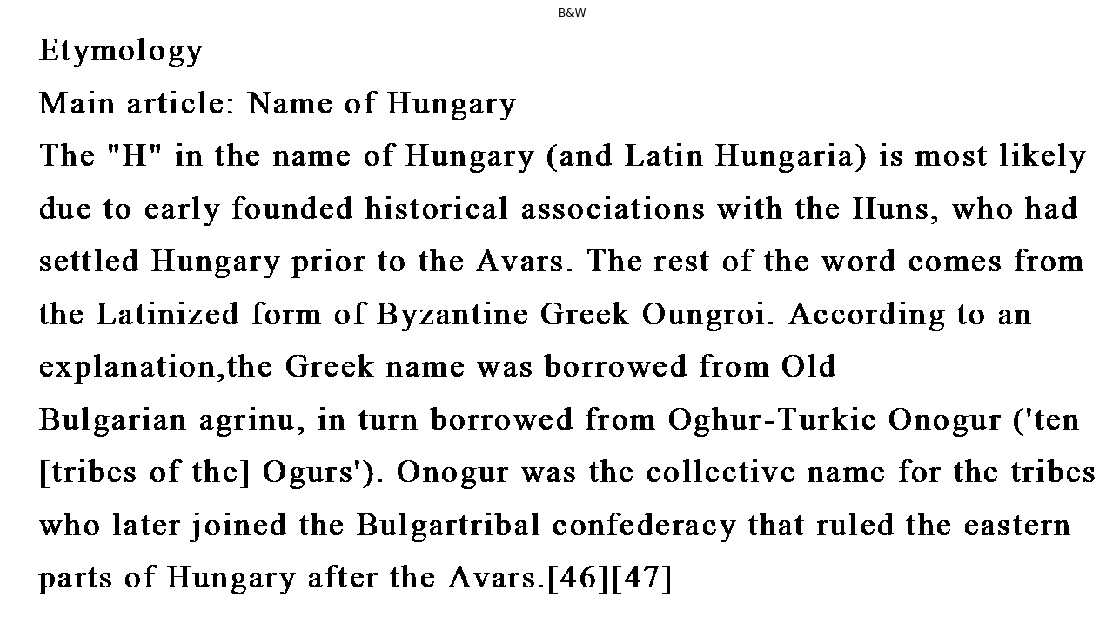

Etymology
Main article: Name of Hungary
The ''H'' in the name of Hungary (and Latin Hungaria) is most likely
due to early founded historical associations with the Huns, who had
settled Hungary prior to the Avars. The rest of the word comes ftom
the Latinized form of Byzantine Greek Oungroi. According to an
explanation,the Greek name was borrowed ftom Old
Bulgarian agrinu, in turn borrowed ftom Oghur.Turkic Onogur ('ten
[tribes of the] Ogurs'). Onogur was the collective name for the tribes
who later joined the Bulgartribal confederacy that ruled the eastern
parts of Hungary after the Avars.[46][47]



In [16]:
prediction = ""
for line in lines:
    for char in line['chars']:
        if "prediction" in char:
            prediction+=char['prediction']
    prediction+="\n"
plotimage(bw, 'B&W', figsize=(15,15))
print(prediction)

### Save result in a json file

In [17]:
s = json.dumps({"image_path": image_path, "threshold": thresh, "lines":lines}, indent=2)
with open(image_path+'.lines.json', 'w') as f:
    f.write(s)




# Calculate Prediction Accuracy

In [18]:
with open(expected_path) as f:
    expectation = f.read()

print("Expectation:")
print("-"*20)
print(expectation)
print("="*50, end="\n\n")
print("Prediction:")
print("-"*20)
print(prediction)

Expectation:
--------------------
Etymology
Main article: Name of Hungary
The "H" in the name of Hungary (and Latin Hungaria) is most likely
due to early founded historical associations with the Huns, who had
settled Hungary prior to the Avars. The rest of the word comes from
the Latinized form of Byzantine Greek Oungroi. According to an
explanation,the Greek name was borrowed from Old
Bulgarian agrinu, in turn borrowed from Oghur-Turkic Onogur ('ten
[tribes of the] Ogurs'). Onogur was the collective name for the tribes
who later joined the Bulgartribal confederacy that ruled the eastern
parts of Hungary after the Avars.[46][47]

Prediction:
--------------------
Etymology
Main article: Name of Hungary
The ''H'' in the name of Hungary (and Latin Hungaria) is most likely
due to early founded historical associations with the Huns, who had
settled Hungary prior to the Avars. The rest of the word comes ftom
the Latinized form of Byzantine Greek Oungroi. According to an
explanation,the Greek

In [19]:
exp = expectation

In [20]:
def html_append(html_text, text, color='black', weight='normal', bg = 'white'):
    text = text.replace('\n', '<br />')
    
    return html_text + "<span style='background-color: {}; color: {}; font-weight: {};'>{}</span>".format(bg, color, weight, text)

In [21]:
d = Differ()

diff = list(d.compare(prediction, exp))
errors = 0
html_text = "<pre>"
for c in diff:
    if c[0]=='+':
        html_text = html_append(html_text, c[-1], 'white', weight='bold', bg='blue')
        errors+=1
    elif c[0]=='-':
        html_text = html_append(html_text, c[-1], 'white', weight='bold', bg='red')
        errors+=1
    else:
        html_text = html_append(html_text, c[-1], 'green')
    
html_text += "</pre>"
html_print(html_text)

In [22]:
errors//=2
total = len([x for x in exp if x != '\n'])
print("Errors: {}/{}".format(errors, total))
print("Accuracy= {}%".format(round((1-errors/total)*100,3)))

Errors: 7/592
Accuracy= 98.818%
